In [1]:
import pandas

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt

In [3]:
from datetime import datetime

In [4]:
from Taxi.stats_from_table import get_rows_from_db

In [5]:
query = "SELECT * FROM taxi_trip_shorted"
rows = get_rows_from_db(query=query)

In [6]:
data_frame = pandas.DataFrame(data=list(rows), columns=rows.column_names)
data_frame_saved = data_frame

In [ ]:
import itertools
from Taxi.importer_distance import make_rows_for_insertion, Row
data = list(itertools.islice(make_rows_for_insertion(), 10000))
data_frame = pandas.DataFrame(data=data, columns=Row._fields)
data_frame_saved = data_frame

In [7]:
data_frame.sort_values(['trip_year', 'trip_month', 'trip_day'], ascending=[True, True, True])

trip_year  trip_month  trip_day              trip_id   distance  \
1253061       2013           7         1  1372636853620000380   2.011479   
1253062       2013           7         1  1372636854620000520   7.982392   
1253063       2013           7         1  1372636858620000589   2.652604   
1253064       2013           7         1  1372636875620000233   2.234674   
1253065       2013           7         1  1372636896620000360   8.459566   
1253066       2013           7         1  1372636951620000320  17.540985   
1253067       2013           7         1  1372636956620000167   3.631592   
1253068       2013           7         1  1372636965620000231   5.432139   
1253069       2013           7         1  1372637072620000367  16.533831   
1253070       2013           7         1  1372637084620000285   2.464219   
1253071       2013           7         1  1372637091620000337   4.819646   
1253072       2013           7         1  1372637210620000456   3.446940   
1253073       2013           7         1  1372637230620000503   3.930190   
1253074       2013           7         1  1372637247620000067   2.890284   
1253075       2013           7         1  1372637254620000657   6.895468   
1253076       2013           7         1  1372637274620000403   4.405603   
1253077       2013           7         1  1372637299620000011   2.635682   
1253078       2013           7         1  1372637303620000596   3.458198   
1253079       2013           7         1  1372637343620000571   5.828683   
1253080       2013           7         1  1372637345620000589   3.670984   
1253081       2013           7         1  1372637369620000381   2.120810   
1253082       2013           7         1  1372637397620000190   9.546978   
1253083       2013           7         1  1372637423620000341   7.756755   
1253084       2013           7         1  1372637453620000648   4.523815   
1253085       2013           7         1  1372637482620000005   2.706064   
1253086       2013           7         1  1372637610620000497  16.305080   
1253087       2013           7         1  1372637658620000596   2.933874   
1253088       2013           7         1  1372637715620000398   3.289894   
1253089       2013           7         1  1372637721620000678  10.910280   
1253090       2013           7         1  1372637728620000671   2.423291   
...            ...         ...       ...                  ...        ...   
624731        2014           7         1  1404171468620000434  20.696282   
624732        2014           7         1  1404171555620000252   2.454317   
624733        2014           7         1  1404171559620000173  11.795974   
624734        2014           7         1  1404171590620000307   4.944495   
624735        2014           7         1  1404171621620000395   2.247473   
624736        2014           7         1  1404171630620000356   3.065938   
624737        2014           7         1  1404171647620000403   0.835352   
624738        2014           7         1  1404171659620000597  28.945109   
624739        2014           7         1  1404171701620000392   1.871337   
624740        2014           7         1  1404171731620000140   3.546068   
624741        2014           7         1  1404171741620000503   2.161529   
624742        2014           7         1  1404171774620000108   5.696542   
624743        2014           7         1  1404171854620000114   7.743745   
624744        2014           7         1  1404171888620000651   0.887309   
624745        2014           7         1  1404172026620000269   3.287017   
624746        2014           7         1  1404172079620000672   1.610841   
624747        2014           7         1  1404172084620000665   9.831236   
624748        2014           7         1  1404172147620000308   6.354203   
624749        2014           7         1  1404172198620000260   3.467318   
624750        2014           7         1  1404172202620000154   0.893257   
624751        2014           7         1  140417220862000

In [8]:
data_frame["distance"].nlargest(10)

1242296    4785.469985
1009535    4657.446792
1385615    4657.443042
1383357    4650.368739
1008390    4650.322177
620294     4649.998414
1242999    4649.971222
1382656    4649.967858
1383628    4649.833336
33886      4646.751306
Name: distance, dtype: float64

In [9]:
best_taxi_per_month = data_frame.groupby(['trip_year', 'trip_month', 'taxi_id'])["distance"].sum().nlargest(10)
best_taxi_per_month

trip_year  trip_month  taxi_id 
2013       7           20000403    129830.295695
                       20000400    117528.064768
                       20000554    108496.192743
                       20000080     99268.854307
                       20000167     95148.250963
                       20000108     86129.423312
                       20000616     72223.568672
                       20000424     54441.768863
                       20000484     47385.956453
                       20000166     43981.410177
Name: distance, dtype: float64

In [10]:
data_frame['month_date'] = \
    data_frame[['trip_year', 'trip_month']]. \
    apply(lambda s : datetime(*s, day = 1, hour = 0), axis = 1)

In [11]:
month_distance__mean = data_frame.groupby(['trip_year', 'trip_month'])["distance"].mean()

<IPython.core.display.Javascript object>


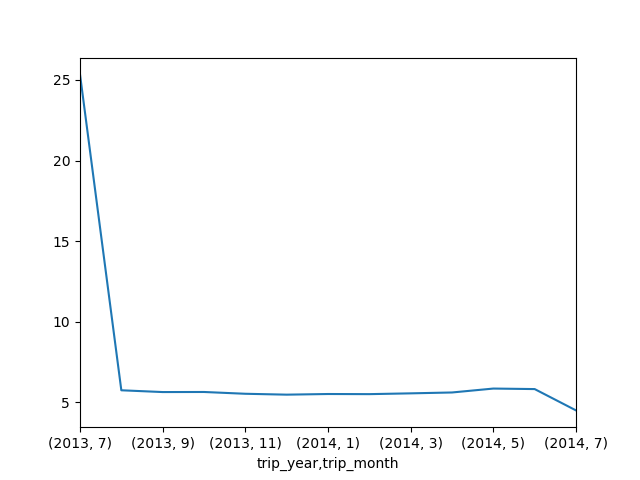

In [12]:
month_distance__mean.plot()
plt.show()